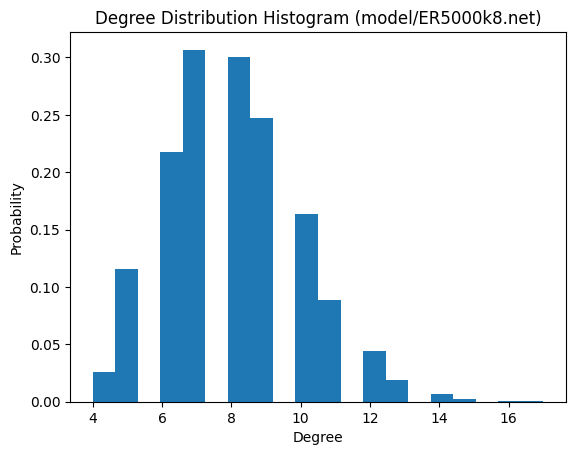

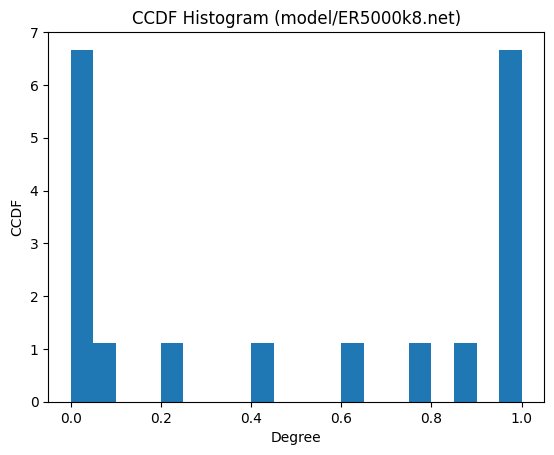

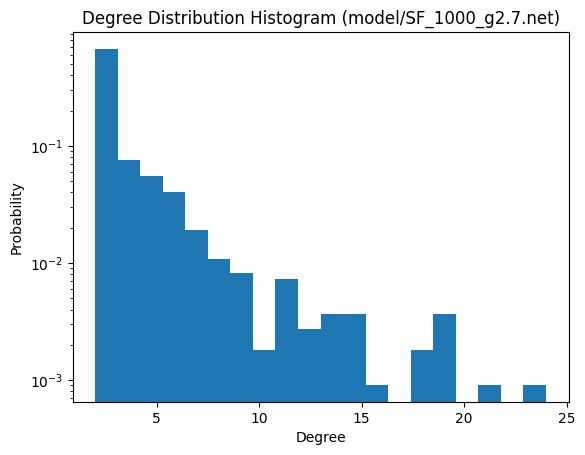

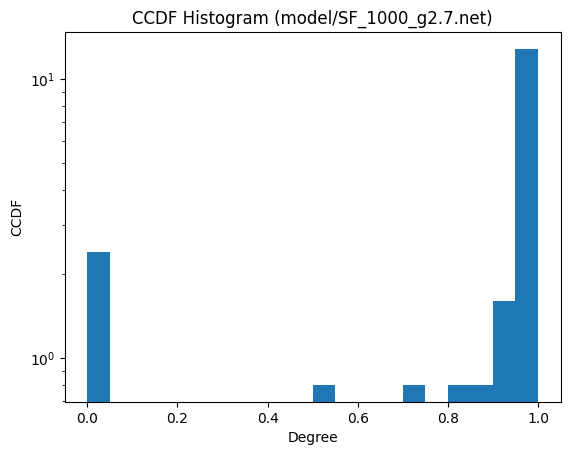

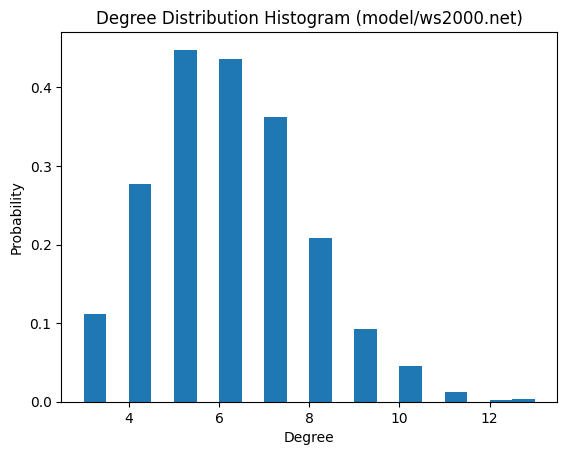

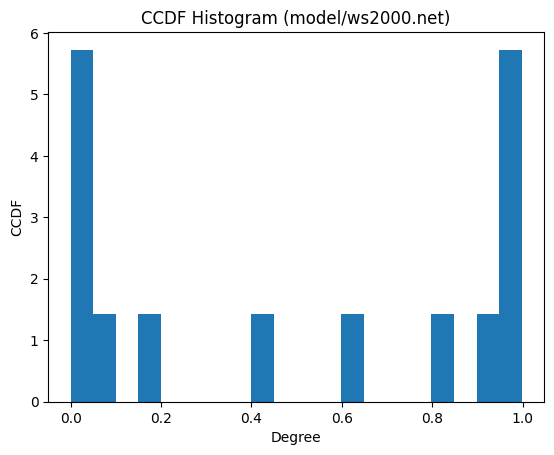

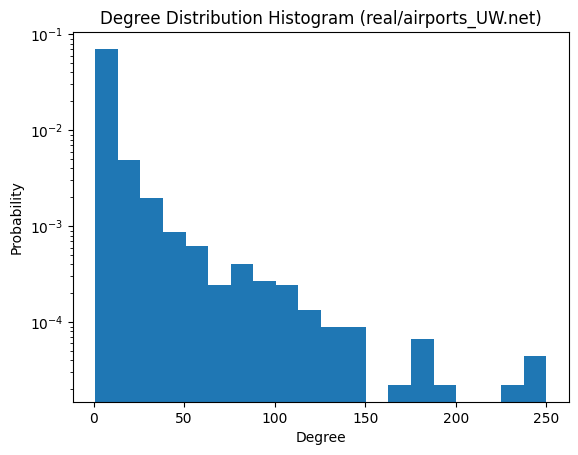

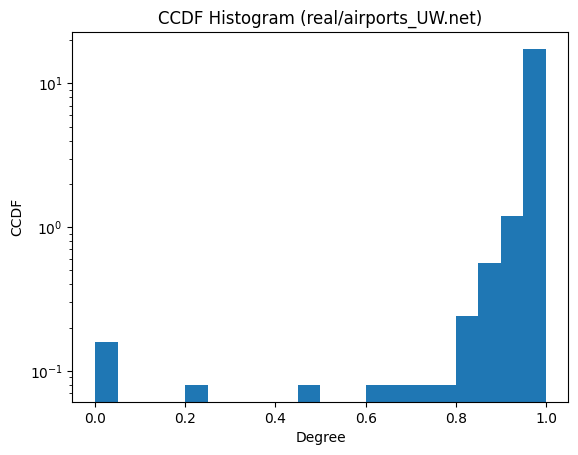

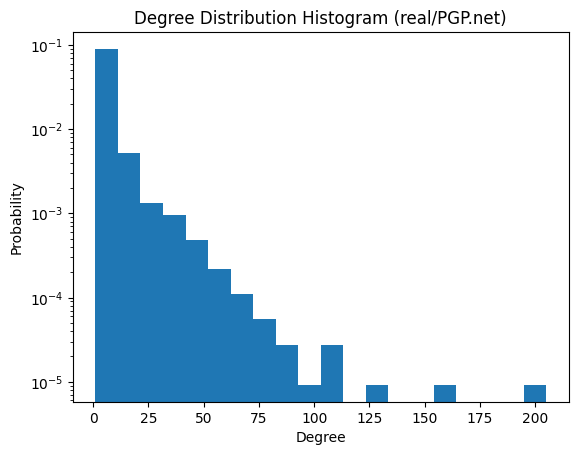

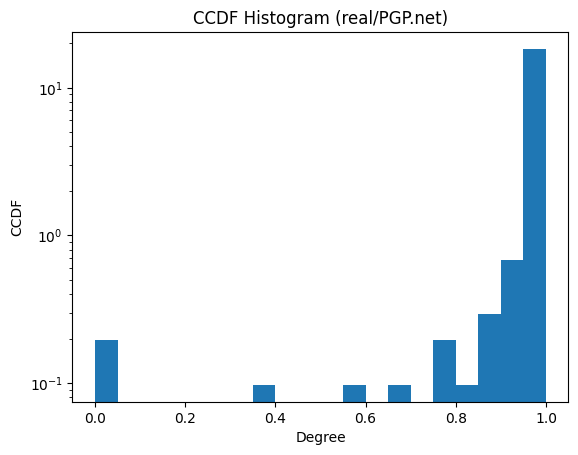

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the list of network file paths
network_files = [
    "model/ER5000k8.net",
    "model/SF_1000_g2.7.net",
    "model/ws2000.net",
    "real/airports_UW.net",
    "real/PGP.net"
]

# Define the appropriate histogram form for each network
histogram_forms = [
    "linear",
    "log-log",
    "linear",
    "log-log",
    "log-log"
]

# Define the number of bins for the histograms
num_bins = 20

# Iterate over each network file
for file_path, histogram_form in zip(network_files, histogram_forms):
    # Load the network from the file
    G = nx.Graph(nx.read_pajek(file_path))

    # Calculate the degree distribution
    degree_sequence = [d for n, d in G.degree()]

    # Plot the degree distribution histogram
    plt.figure()
    plt.hist(degree_sequence, bins=num_bins, density=True, log=histogram_form=="log-log")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.title(f"Degree Distribution Histogram ({file_path})")
    plt.show()

    # Calculate the complementary cumulative degree distribution
    ccdf_sequence = [1 - sum(1 for d in degree_sequence if d >= k) / len(degree_sequence) for k in range(max(degree_sequence) + 1)]

    # Plot the CCDF histogram
    plt.figure()
    plt.hist(ccdf_sequence, bins=num_bins, density=True, log=histogram_form=="log-log")
    plt.xlabel("Degree")
    plt.ylabel("CCDF")
    plt.title(f"CCDF Histogram ({file_path})")
    plt.show()
